In [33]:
import numpy as np
from sklearn.decomposition import PCA
import torch
import matplotlib.pyplot as plt

Walking through Figure6_InputPrep.py and Figure6.py. Eventually need to run MNIST part of train_predloss.sh

## Figure6_InputPrep.py

In [ ]:
""" Get data """
Path = "/cnl/home/yuchen/Documents/HCPrediction/Elman_SGD/predloss/"
images = np.load(Path + "Rotated/MNIST_X_train.npy")
labels = np.load(Path + "Rotated/MNIST_labels.npy")

print(images.shape)
print(labels.shape)

(60000, 784)
(60000,)


In [ ]:
""" pca transform images. scale and center """
pca = PCA(n_components=68)
pca.fit(images)
print(np.sum(pca.explained_variance_ratio_))
Im_de = pca.transform(images)  # just transform
center = (np.max(Im_de) + np.min(Im_de)) / 2
scale = (np.max(Im_de) - np.min(Im_de)) / 2
Im_de_scale = (Im_de - center) / scale  # transform and norm
Im_re = pca.inverse_transform(Im_de_scale * scale + center)  # to reconstruct og

0.8701351744489451


In [21]:
""" convert MNIST to PCA tensors """
im_num = []
for i in np.arange(10):
    im = Im_de_scale[labels == i, :]
    im_num.append(im)

N = Im_de.shape[1]
SeqN = 100
Ns = 5
LoopN = round(SeqN / 10)
tmp = np.zeros((Ns, SeqN, N))
for i in np.arange(Ns):
    for j in np.arange(10):
        idx = np.arange(0, 10 * LoopN, 10) + j
        im_pre = im_num[j][np.arange(LoopN) + i * LoopN]
        tmp[i, idx, :] = im_pre

In [ ]:
""" convert to torch type and save """
# X_mini = torch.tensor(tmp.astype(np.single))
# torch.save({'X_mini':X_mini,'Target_mini': X_mini},
# 	Path + 'MNIST_68PC_SeqN{}_Ns{}.pth.tar'.format(SeqN,Ns))

## train_predloss.sh

In [ ]:
input_seq = torch.load(Path + "MNIST_68PC_SeqN10_Ns20.pth.tar")
X_mini = input_seq["X_mini"]
Target_mini = input_seq["Target_mini"]
print(X_mini.shape)
print(Target_mini.shape)
# Dimensions: [time? batchN?, reduced_IC?, n_PCs]

torch.Size([20, 10, 68])
torch.Size([20, 10, 68])


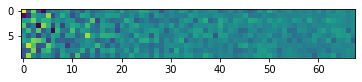

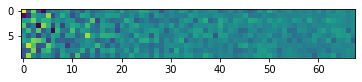

In [41]:
# Dimension 1
plt.imshow(X_mini[0, :, :])
plt.show()
plt.imshow(Target_mini[0, :, :])
plt.show()

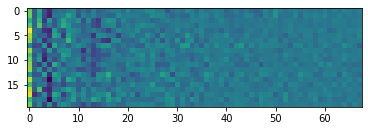

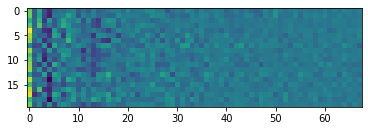

In [42]:
# Dimension 2
plt.imshow(X_mini[:, 0, :])
plt.show()
plt.imshow(Target_mini[:, 0, :])
plt.show()

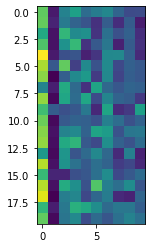

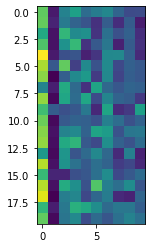

In [43]:
# Dimension 3
plt.imshow(X_mini[:, :, 0])
plt.show()
plt.imshow(Target_mini[:, :, 0])
plt.show()

## Figure6.py